In [2]:
import xarray as xr
import os
import glob
import re
from tqdm import tqdm

from plot_cluster_data import collect_data_for_all_clusters

In [ ]:
# data_path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/fquareng/data"
data_path = "/Users/fquareng/data/"
dem_path = "dem_squares"
target_path = "8h-PS-RELHUM_2M-T_2M_cropped_gridded_clustered_threshold"
source_path = "8h-PS-RELHUM_2M-T_2M_cropped_gridded_clustered_threshold_blurred"
figures_directory = f"/Users/fquareng/phd/AdaptationSandbox/figures/feature_transformation"


In [6]:
# Check if source and target are correctly clustered

def has_same_pattern(list1, list2, pattern):
    for file1 in list1:
        if not re.search(pattern, file1) or not any(re.search(pattern, f) for f in list2):
            return False
    for file2 in list2:
        if not re.search(pattern, file2) or not any(re.search(pattern, f) for f in list1):
            return False
    return True

for cluster_id in range(8):
    print("Cluster:", cluster_id)
    list1 = glob.glob(os.path.join(os.path.join(data_path, source_path, f"cluster_{cluster_id}"), "*.nz"))
    list2 = glob.glob(os.path.join(os.path.join(data_path, target_path, f"cluster_{cluster_id}"), "*.nz"))
    pattern = r"lffd\d{8}\d{6}" # Replace pattern with the appropriate regular expression to match your filenames

    if has_same_pattern(list1, list2, pattern):
        print("Both lists contain files with the same pattern.")
    else:
        print("The lists do not contain the same pattern.")

Cluster: 0
Both lists contain files with the same pattern.
Cluster: 1
Both lists contain files with the same pattern.
Cluster: 2
Both lists contain files with the same pattern.
Cluster: 3
Both lists contain files with the same pattern.
Cluster: 4
Both lists contain files with the same pattern.
Cluster: 5
Both lists contain files with the same pattern.
Cluster: 6
Both lists contain files with the same pattern.
Cluster: 7
Both lists contain files with the same pattern.


In [ ]:
# Collect data for all clusters
n_clusters = 8
source_cluster_data = collect_data_for_all_clusters(
    os.path.join(data_path, source_path), os.path.join(data_path, dem_path), n_clusters)


100%|██████████| 8/8 [00:00<00:00, 307838.83it/s]


In [8]:
target_cluster_data = collect_data_for_all_clusters(
    os.path.join(data_path, target_path), os.path.join(data_path, dem_path), n_clusters)


100%|██████████| 8/8 [00:00<00:00, 258111.02it/s]


In [ ]:
# Implement physical transformations

## Q: Is there a difference between source and target? If yes, where does it come from exactly?
## Q: Can I achieve an elevation-invariant space?
## Q: Are all clusters the same? What happens if I plot the whole dataset?

# Plot all data (variable vs elevation) with and without transformation


In [1]:
import numpy as np

train_loss = np.array([2.54921938e+03, 2.69361474e+01, 2.09526893e+01, 1.48503077e+01,
       1.09017474e+01, 6.68671466e+00, 4.05568557e+00, 2.85000921e+00,
       2.37099372e+00, 2.09628182e+00, 1.06688034e+00, 1.25146239e+00,
       1.24244507e+00, 1.19540497e+00, 1.15588480e+00, 1.14452622e+00,
       1.10904794e+00, 1.08837534e+00, 1.07484986e+00, 1.03752378e+00,
       8.21292400e-01, 8.61858600e-01, 8.51800846e-01, 8.35904411e-01,
       8.35206322e-01, 8.15846032e-01, 8.20358784e-01, 8.05435947e-01,
       8.08660401e-01, 7.94989524e-01, 7.31615237e-01, 7.37305015e-01,
       7.35080080e-01, 7.33501906e-01, 7.28739921e-01, 7.25652548e-01,
       7.20121634e-01, 7.18351489e-01, 7.12903141e-01, 7.08811942e-01])

val_loss = np.array([12.97382623,  5.80351894,  4.01703484, 19.90071351,  4.42849891,
        2.28872724,  3.26814637,  1.82312134,  4.85628626,  2.8827937 ,
        1.93212351,  1.40093489,  1.27326665,  1.52567619,  1.2250455 ,
        1.21150685,  1.67290459,  1.05514826,  1.05639884,  1.70193887,
        0.9859895 ,  1.03247461,  1.00521633,  1.06681084,  1.41519967,
        0.96480494,  1.05054887,  0.91880294,  0.90741858,  0.90011547,
        0.93934442,  0.91451759,  0.91923748,  0.89892434,  0.87291276,
        0.88052362,  0.89330383,  0.8734847 ,  0.88413148,  0.89839915])

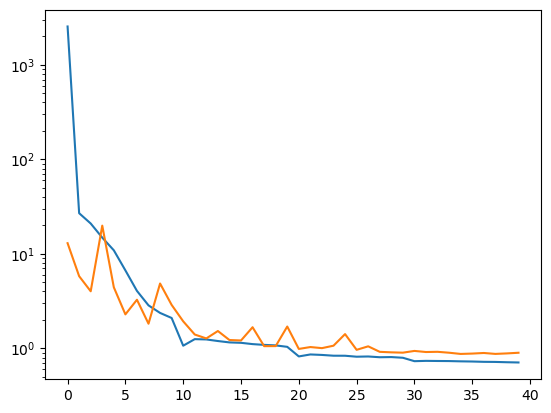

In [7]:
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.plot(val_loss)
plt.yscale("log")